In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE ,f_regression

### Read csv file and check data

In [147]:
data = pd.read_csv("prediktiv_data.csv",index_col="id")
data.tail()

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
id,,,,,,,,,,,,,,,,,,,,,
2926,142500,2.0,588.0,0,1003.0,1003,6,1003,6,6,...,0,NaN,bad,3,1,3,2006,0,0,1984
2927,131000,2.0,484.0,0,864.0,902,5,902,5,5,...,0,NaN,bad,2,1,6,2006,0,0,1983
2928,132000,0.0,0.0,0,912.0,970,6,970,5,5,...,0,NaN,bad,3,1,7,2006,0,0,1992
2929,170000,2.0,418.0,0,1389.0,1389,6,1389,5,5,...,1,bad,bad,2,1,4,2006,0,0,1975
2930,188000,3.0,650.0,0,996.0,996,9,2000,7,5,...,1,bad,bad,3,1,11,2006,1,1004,1994


In [148]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       2930 non-null   int64  
 1   feature01    2929 non-null   float64
 2   feature02    2929 non-null   float64
 3   feature03    2930 non-null   int64  
 4   feature04    2929 non-null   float64
 5   feature05    2930 non-null   int64  
 6   feature06    2930 non-null   int64  
 7   feature07    2930 non-null   int64  
 8   feature08    2930 non-null   int64  
 9   feature09    2930 non-null   int64  
 10  feature10    2930 non-null   int64  
 11  feature10.1  2930 non-null   int64  
 12  feature11    198 non-null    object 
 13  feature12    572 non-null    object 
 14  feature13    2929 non-null   object 
 15  feature14    2930 non-null   int64  
 16  feature15    1508 non-null   object 
 17  feature16    2930 non-null   object 
 18  feature17    2930 non-null   int64  
 19  featur

,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,feature09,feature10,feature10.1,feature14,feature17,feature18,feature19,feature20,feature21,feature22,feature23
count,2930.000000,2929.000000,2929.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1.766815,472.819734,2.243345,1051.614544,1159.557679,6.443003,1499.690444,6.094881,5.563140,1971.356314,1.566553,0.599317,2.854266,1.044369,6.216041,2007.790444,0.379522,335.455973,1984.266553
std,79886.692357,0.760566,215.046549,35.597181,440.615067,391.890885,1.572964,505.508887,1.411026,1.111537,30.245361,0.552941,0.647921,0.827731,0.214076,2.714492,1.316613,0.502629,428.395715,20.860286
min,12789.000000,0.000000,0.000000,0.000000,0.000000,334.000000,2.000000,334.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,1950.000000
25%,129500.000000,1.000000,320.000000,0.000000,793.000000,876.250000,5.000000,1126.000000,5.000000,5.000000,1954.000000,1.000000,0.000000,2.000000,1.000000,4.000000,2007.000000,0.000000,0.000000,1965.000000
50%,160000.000000,2.000000,480.000000,0.000000,990.000000,1084.000000,6.000000,1442.000000,6.000000,5.000000,1973.000000,2.000000,1.000000,3.000000,1.000000,6.000000,2008.000000,0.000000,0.000000,1993.000000
75%,213500.000000,2.000000,576.000000,0.000000,1302.000000,1384.000000,7.000000,1742.750000,7.000000,6.000000,2001.000000,2.000000,1.000000,3.000000,1.000000,8.000000,2009.000000,1.000000,703.750000,2004.000000
max,755000.000000,5.000000,1488.000000,800.000000,6110.000000,5095.000000,15.000000,5642.000000,10.000000,9.000000,2010.000000,4.000000,4.000000,8.000000,3.000000,12.000000,2010.000000,2.000000,2065.000000,2010.000000


## Preprocess
* Kolla NaN values och fixa till
* kolla kolumner och se efter om någon behövs ta bort eller göras om till dummy
* plotta och se samhörighet med target
* kolla efter outliers

In [149]:
## Ta bort feature 11,12  då de har väldigt många nan values och feature15 har samma värden som feature 16
df = data[["feature11","feature12","feature15"]]
data.drop(df,axis=1,inplace=True)
## Ta bort resterande NaN värden då det bara är några enstaka
data.dropna(inplace=True)
## ta bort feature03 då den har ett värdet 0, 2914 ggr av 2927
data.drop("feature03",axis=1,inplace=True)

In [150]:
## ändra namn på feature 10.1
data.rename(columns={"feature10.1":"feature11"}, inplace=True)

In [151]:
## Gör om till dummy variabler
data = pd.concat([data, pd.get_dummies(data['feature13'], prefix='feature13',dtype=int, drop_first=True)],axis=1)
data = pd.concat([data, pd.get_dummies(data['feature16'], prefix='feature16',dtype=int, drop_first=True)],axis=1)
data.drop(["feature13","feature16"],axis=1,inplace=True)

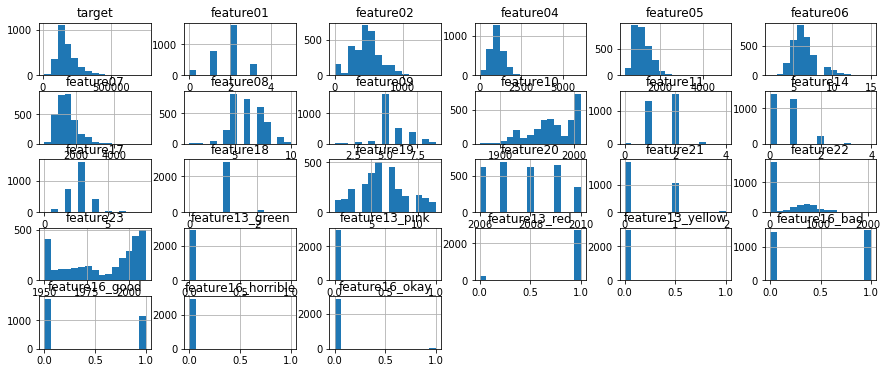

In [152]:
##Plotta för att undersöka data

data.hist(bins=15, figsize=(15, 6), layout=(5, 6));

* En del positivt och negativa skewed features.
* Target är positivt skewed
* Plotta mot target : vissa features ser ut att ha en korrelation med target.

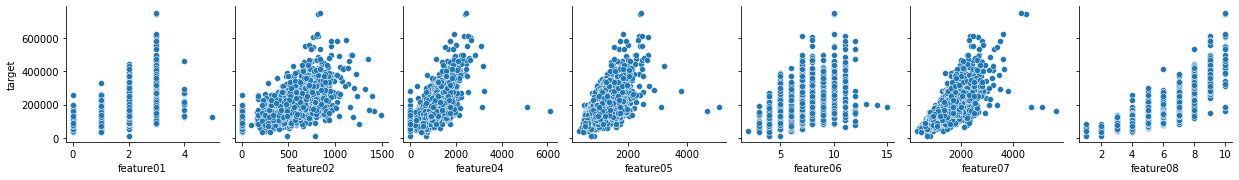

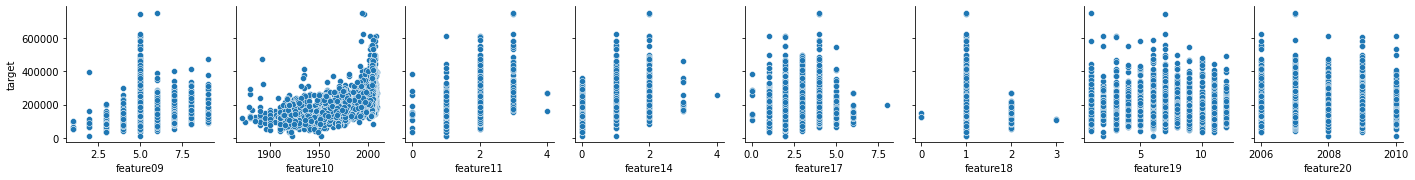

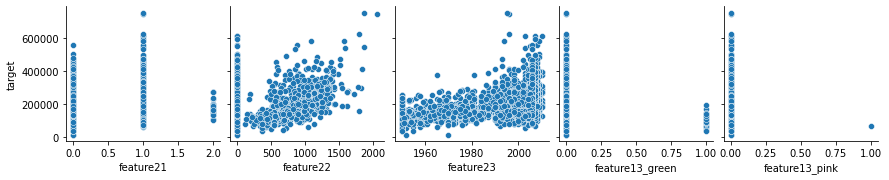

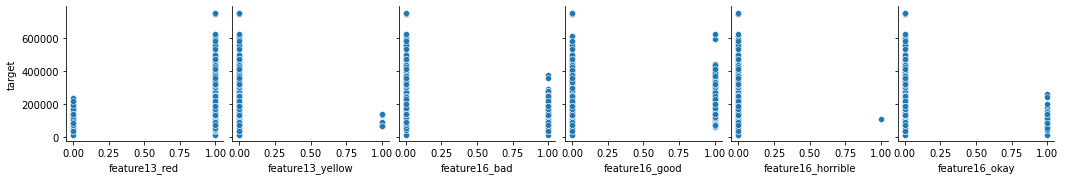

In [153]:
sns.pairplot(data,y_vars=["target",],x_vars= data.iloc[:,1:8])
sns.pairplot(data,y_vars=["target",],x_vars= data.iloc[:,8:16])
sns.pairplot(data,y_vars=["target",],x_vars= data.iloc[:,16:21])
sns.pairplot(data,y_vars=["target",],x_vars= data.iloc[:,21:27])

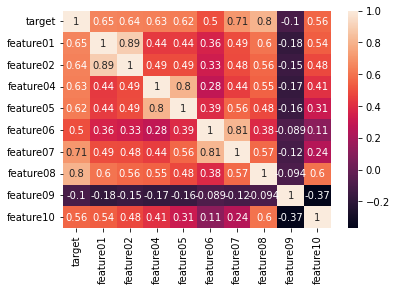

In [154]:
data_feat1 = data.iloc[:,0:10]
sns.heatmap(data_feat1.corr(), annot=True)
plt.show()


* corr matrix: vi kan se att en del variabler är korrelerade med varandra. Kommer dock inte ta bort dessa kolumner då de inte har stor betydelse för att mitt mål är att prediktera data i regression.
* källa: https://www.statology.org/multicollinearity-regression/

### Outliers
* Testade att köra med och utan outliers! på de flesta modeller, det bästa var att ta bort outliers med hjälp av IQR.
* De flesta error metrics blev även bättre

target                   AxesSubplot(0.125,0.772143;0.133621x0.107857)
feature01             AxesSubplot(0.285345,0.772143;0.133621x0.107857)
feature02              AxesSubplot(0.44569,0.772143;0.133621x0.107857)
feature04             AxesSubplot(0.606034,0.772143;0.133621x0.107857)
feature05             AxesSubplot(0.766379,0.772143;0.133621x0.107857)
feature06                AxesSubplot(0.125,0.642714;0.133621x0.107857)
feature07             AxesSubplot(0.285345,0.642714;0.133621x0.107857)
feature08              AxesSubplot(0.44569,0.642714;0.133621x0.107857)
feature09             AxesSubplot(0.606034,0.642714;0.133621x0.107857)
feature10             AxesSubplot(0.766379,0.642714;0.133621x0.107857)
feature11                AxesSubplot(0.125,0.513286;0.133621x0.107857)
feature14             AxesSubplot(0.285345,0.513286;0.133621x0.107857)
feature17              AxesSubplot(0.44569,0.513286;0.133621x0.107857)
feature18             AxesSubplot(0.606034,0.513286;0.133621x0.107857)
featur

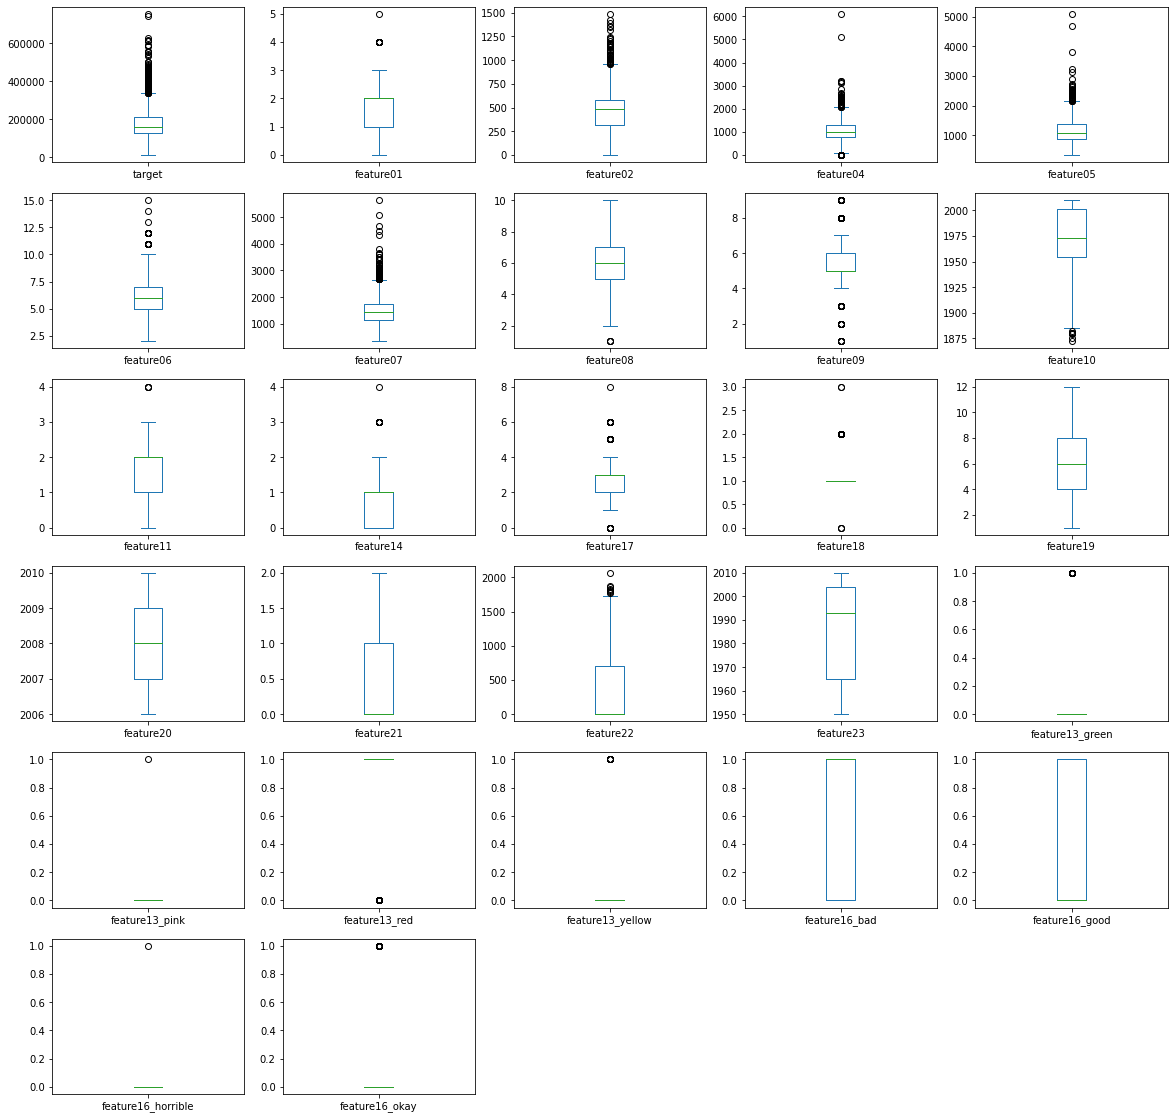

In [155]:
## Kolla efter outliers
data.plot(kind="box",subplots=True,layout=(6,5), figsize=(20,20))

In [156]:
X = data.drop("target",axis=1)
y = data["target"]
feature_names = X.columns

In [157]:
##Ta bort outliers med IQR
q1= X.quantile(0.25)
q3= X.quantile(0.75)

iqr=q3-q1

data_no_outliers = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]

##Källa https://tousu.in/qa/?qa=837465/


C:\Users\Gabriel\AppData\Local\Temp/ipykernel_21480/3890975763.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_no_outliers = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]


In [158]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=123)

In [170]:
##skapa en model error metrics för att jämföra hur bra modellerna är jämfört med varandra
model_error_metrics = pd.DataFrame(index=["train_mse", "test_mse","train_r2","test_r2","train_mae","test_mae"], 
                      columns=["NULL", "KNN", "MLR","ELASTICNET"])
## lägg in Null model i dataframe
y_pred_null = y_train.mean()
model_error_metrics.loc["train_mse","NULL"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
model_error_metrics.loc["test_mse","NULL"] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

model_error_metrics.loc["train_r2","NULL"] =r2_score(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
model_error_metrics.loc["test_r2","NULL"] = r2_score(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

model_error_metrics.loc["train_mae","NULL"] = mean_absolute_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
model_error_metrics.loc["test_mae","NULL"] = mean_absolute_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)
model_error_metrics


,NULL,KNN,MLR,ELASTICNET
train_mse,6408404804.415319,NaN,NaN,NaN
test_mse,6278815928.138765,NaN,NaN,NaN
train_r2,0.0,NaN,NaN,NaN
test_r2,-0.000495,NaN,NaN,NaN
train_mae,58567.637605,NaN,NaN,NaN
test_mae,57638.001088,NaN,NaN,NaN


### KNeighborsRegressor
* Bästa parametrar: 'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'distance'

In [175]:
# skapa steps och gör en pipelin för att därefter använda gridsearch för bästa parametrar
steps = [('scaler',MinMaxScaler()),
         ('knn',KNeighborsRegressor())]
pipeline = Pipeline(steps)
params = {'knn__n_neighbors': np.arange(5,15,1),
          'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'knn__metric':['euclidean','minkowski','manhattan'],
          'knn__weights':['uniform','distance']}
gridcv = GridSearchCV(pipeline,params,cv=3,n_jobs=-1)
gridcv.fit(X_train,y_train)
print(gridcv.score(X_test,y_test))
print(gridcv.best_params_)



0.8671936042169882
{'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'distance'}


In [176]:
model_error_metrics.loc["train_mse","KNN"] = mean_squared_error(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_mse","KNN"] = mean_squared_error(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)
model_error_metrics.loc["train_mae","KNN"] = mean_absolute_error(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_mae","KNN"] = mean_absolute_error(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)
model_error_metrics.loc["train_r2","KNN"] = r2_score(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_r2","KNN"] = r2_score(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)

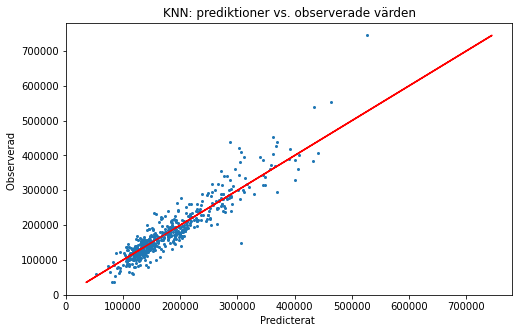

In [162]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(gridcv.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: prediktioner vs. observerade värden')
ax.set_xlabel('Predicterat ')
ax.set_ylabel('Observerad ');

## Multi linear regression
* bästa parametrarna för MLR
{'lasso__fit_intercept': True, 'lasso__positive': False}

In [177]:
steps = [('scaler',MinMaxScaler()),
         ('MLR',LinearRegression())]
pipeline = Pipeline(steps)
params = {'MLR__fit_intercept': [True,False],
          'MLR__positive':[True,False]}
gridcv = GridSearchCV(pipeline,params,cv=3)
gridcv.fit(X_train,y_train)
print(gridcv.score(X_test,y_test))
print(gridcv.best_params_)

0.8720770990194234
{'MLR__fit_intercept': True, 'MLR__positive': False}


In [178]:
model_error_metrics.loc["train_mse","MLR"] = mean_squared_error(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_mse","MLR"] = mean_squared_error(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)
model_error_metrics.loc["train_mae","MLR"] = mean_absolute_error(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_mae","MLR"] = mean_absolute_error(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)
model_error_metrics.loc["train_r2","MLR"] = r2_score(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_r2","MLR"] = r2_score(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)


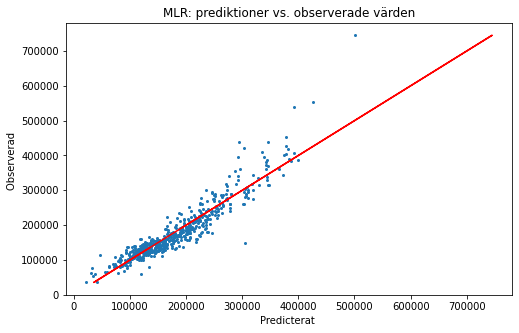

In [165]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(gridcv.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('MLR: prediktioner vs. observerade värden')
ax.set_xlabel('Predicterat ')
ax.set_ylabel('Observerad ');

### Elasticnet 
* bästa parametrar __alpha': 0.2, 'elasticnet__fit_intercept': False, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 1000

In [179]:
steps = [('scaler',MinMaxScaler()),
         ('elasticnet',ElasticNet())]
pipeline = Pipeline(steps)
params = {'elasticnet__alpha': np.arange(0.2,1.5,0.2),
          'elasticnet__l1_ratio': np.arange(0,1,0.1),
          'elasticnet__fit_intercept':[True,False]}
gridcv = GridSearchCV(pipeline,params,cv=5)
gridcv.fit(X_train,y_train)
print(gridcv.score(X_test,y_test))
print(gridcv.best_params_)

C:\Users\Gabriel\miniconda3\envs\pred_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.705e+12, tolerance: 1.219e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gabriel\miniconda3\envs\pred_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.508e+12, tolerance: 1.141e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the so

0.8016043544345259
{'elasticnet__alpha': 0.2, 'elasticnet__fit_intercept': False, 'elasticnet__l1_ratio': 0.9}


In [180]:
model_error_metrics.loc["train_mse","ELASTICNET"] = mean_squared_error(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_mse","ELASTICNET"] = mean_squared_error(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)
model_error_metrics.loc["train_mae","ELASTICNET"] = mean_absolute_error(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_mae","ELASTICNET"] = mean_absolute_error(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)
model_error_metrics.loc["train_r2","ELASTICNET"] = r2_score(y_pred=gridcv.predict(X_train), y_true=y_train)
model_error_metrics.loc["test_r2","ELASTICNET"] = r2_score(y_pred=gridcv.predict(X_test), 
                    y_true=y_test)

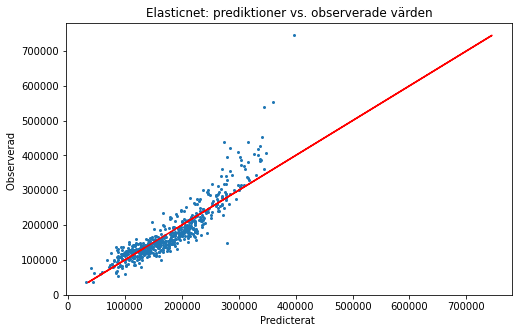

In [168]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(gridcv.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Elasticnet: prediktioner vs. observerade värden')
ax.set_xlabel('Predicterat ')
ax.set_ylabel('Observerad ');

In [181]:
model_error_metrics

,NULL,KNN,MLR,ELASTICNET
train_mse,6408404804.415319,27020.138616,1139050854.261838,1429544981.692558
test_mse,6278815928.138765,833454512.925084,802807112.565045,1245073666.567957
train_r2,0.0,0.999996,0.822257,0.776927
test_r2,-0.000495,0.867194,0.872077,0.801604
train_mae,58567.637605,9.668091,20838.603801,24563.316363
test_mae,57638.001088,19418.712138,19104.636583,23384.158321


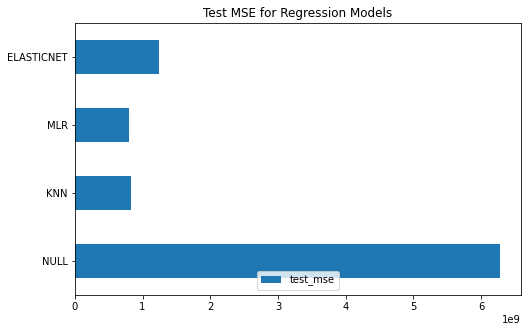

In [182]:
## plotta för att jämföra de olika modellerna gentemot mse
fig, ax = plt.subplots(figsize=(8,5))
model_error_metrics.loc['test_mse'].plot(kind='barh', ax=ax)
ax.set_title('Test MSE for Regression Models')
ax.legend(loc=8, ncol=4);

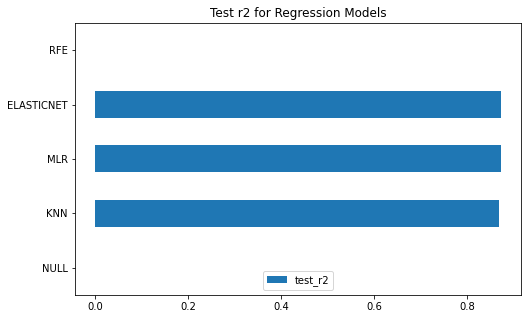

In [771]:
##plotta för att jämföra med modellerna gentemot r2
fig, ax = plt.subplots(figsize=(8,5))
model_error_metrics.loc['test_r2'].plot(kind='barh', ax=ax)
ax.set_title('Test r2 for Regression Models')
ax.legend(loc=8, ncol=4);

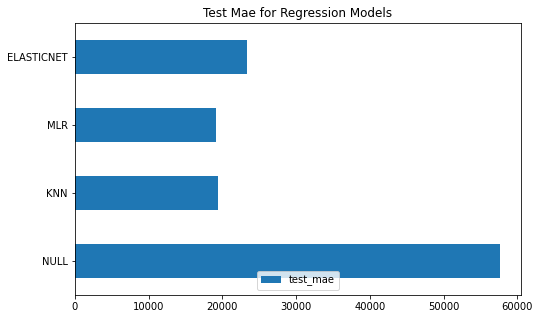

In [183]:
##plotta för att jämföra med modellerna gentemot mae
fig, ax = plt.subplots(figsize=(8,5))
model_error_metrics.loc['test_mae'].plot(kind='barh', ax=ax)
ax.set_title('Test Mae for Regression Models')
ax.legend(loc=8, ncol=4);

### Summering bäst modell

* Bästa modellen i min mening är linear regression. Detta för att den presterar väldigt bra både på test och träningsdata.
* Medan KNN tränar för bra på tränings data och sämre på test data, kan detta tyda på overfitting
* ELASTICNET presterar bra även den men inte bättre än Linearregression

# Feature Selection
* Feature selection med RFE och randomforest estimator
* Vi kan se att med RFE har vi valt ut de flesta features som inte är dummy variabler. 
* Den ger ett väldigt bra score med de features den valt ut

In [184]:
## Anända randomforest MED RFE
Rfr = RandomForestRegressor(n_estimators=400,n_jobs=-1,random_state=123,max_depth=25)
rfe=RFE(Rfr,n_features_to_select=15)
rfe.fit(X_train,y_train)
rfe.score(X_test,y_test)

0.8827411716805642

* Plott som visar de bäst rankade features som visr de bäst rankade features. 1= de feaures som valts!

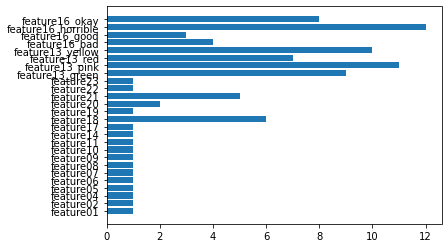

In [185]:
df = {"Feature":rfe.feature_names_in_ ,"Ranking":rfe.ranking_}
df= pd.DataFrame(df,index = np.arange(1,27))
plt.barh(df["Feature"],df["Ranking"]).set_label("Best feature=1")
plt.show()

SUMMERING
* Feature Selection är bra att använda i detta fall. då vi får en relativt bra score.
* Allt i allo så tycker jag MLR presterade bäst av de 3 valda modellerna(Knn,Elasticnet,MLR)